In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import numpy as np
from pandas import ExcelWriter
plt.style.use('ggplot')
from pandas import ExcelWriter

In [151]:
df = pd.read_csv("/Users/rushabh/Rushabh/Untitled Folder/Datasets/zomato-restaurants-data/zomato.csv")
df_country_codes = pd.read_excel("/Users/rushabh/Rushabh/Untitled Folder/Datasets/zomato-restaurants-data/Country-Code.xlsx")

UnicodeDecodeError: 'utf8' codec can't decode bytes in position 3-4: invalid continuation byte

In [152]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Country,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,Phillipines,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,Phillipines,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,Phillipines,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,Phillipines,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,Phillipines,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [17]:
len(df.columns)

21

In [18]:
df_country_codes.columns

Index([u'Country Code', u'Country'], dtype='object')

In [19]:
df = pd.merge(left=df, right=df_country_codes, on='Country Code', how='left')

In [20]:
df.columns

Index([       u'Restaurant ID',      u'Restaurant Name',
               u'Country Code',                 u'City',
                    u'Address',             u'Locality',
           u'Locality Verbose',            u'Longitude',
                   u'Latitude',             u'Cuisines',
       u'Average Cost for two',             u'Currency',
          u'Has Table booking',  u'Has Online delivery',
          u'Is delivering now', u'Switch to order menu',
                u'Price range',     u'Aggregate rating',
               u'Rating color',          u'Rating text',
                      u'Votes',              u'Country'],
      dtype='object')

In [21]:
df=df[['Restaurant ID','Restaurant Name', 'Country Code', 'City',
        'Country', 'Address', 'Locality', 'Locality Verbose', 
        'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 
        'Currency', 'Has Table booking', 'Has Online delivery', 
        'Is delivering now', 'Switch to order menu', 'Price range', 
        'Aggregate rating', 'Rating color', 'Rating text', 'Votes', ]]

In [183]:
#The following 2 cells separate the column 'Cuisines' and 

s = df['Cuisines'].str.split(',').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Cuisine'
#del df['Cuisines']
cuisine_df = df.join(s)

In [23]:
#The following 2 cells plot the graph

country_count_df = pd.DataFrame(df.Country.value_counts(),).reset_index()
country_count_df.columns=['Country','Count']

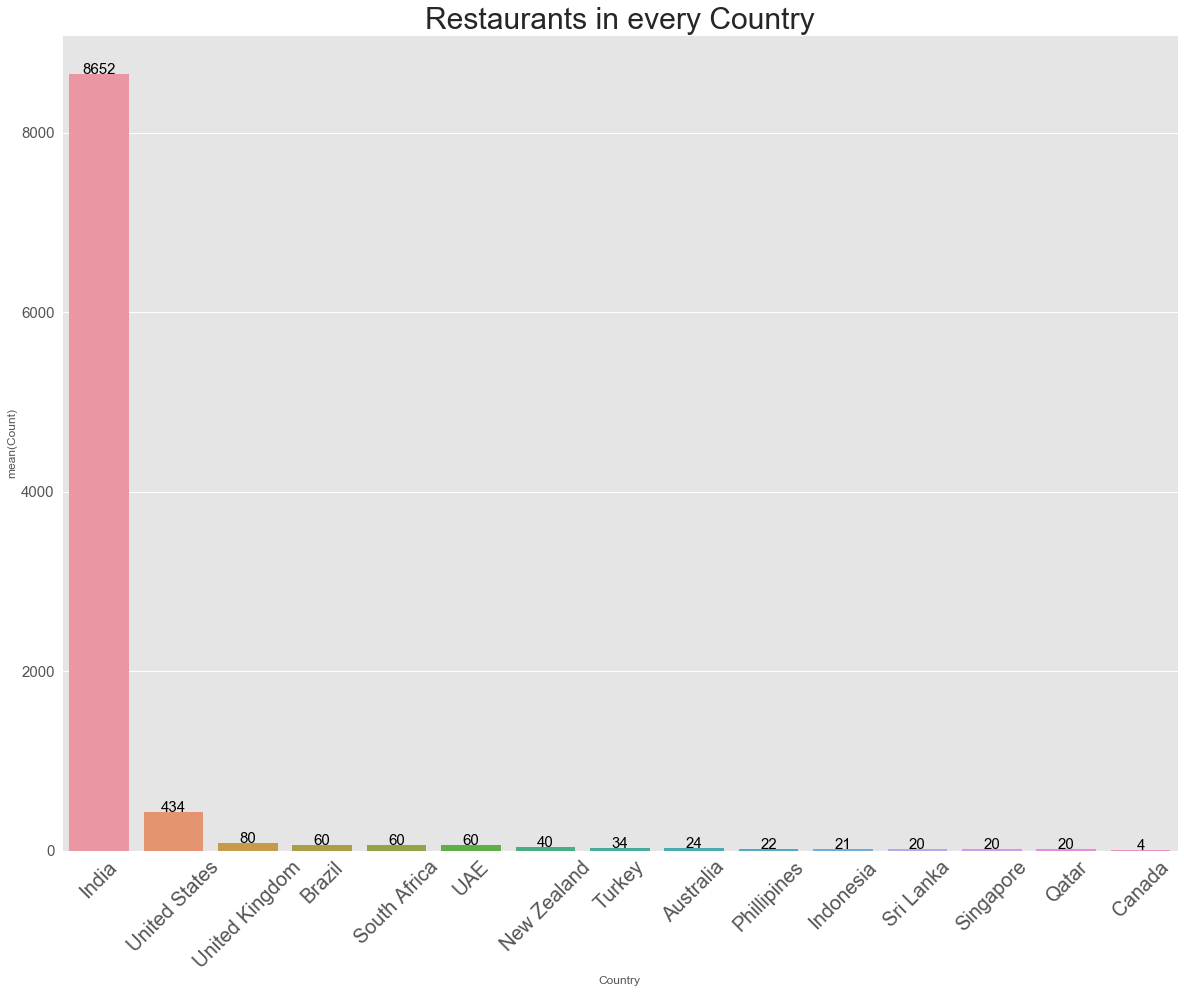

In [131]:
plt.figure(figsize=(20,15))
sns.barplot(country_count_df.Country, country_count_df.Count)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=15)
plt.title("Restaurants in every Country", fontsize=30)
x=0
for i in country_count_df.values:
    plt.text(x, i[1], i[1], color='black', ha="center", fontsize=15)
    x+=1

plt.show()

In [25]:
df.columns

Index([       u'Restaurant ID',      u'Restaurant Name',
               u'Country Code',                 u'City',
                    u'Country',              u'Address',
                   u'Locality',     u'Locality Verbose',
                  u'Longitude',             u'Latitude',
                   u'Cuisines', u'Average Cost for two',
                   u'Currency',    u'Has Table booking',
        u'Has Online delivery',    u'Is delivering now',
       u'Switch to order menu',          u'Price range',
           u'Aggregate rating',         u'Rating color',
                u'Rating text',                u'Votes'],
      dtype='object')

In [184]:
#Rearranging the columns

cuisine_df=cuisine_df[['Restaurant ID','Restaurant Name', 'Country Code', 'City',
        'Country', 'Address', 'Locality', 'Locality Verbose', 
        'Longitude', 'Latitude', 'Cuisine', 'Average Cost for two', 
        'Currency', 'Has Table booking', 'Has Online delivery', 
        'Is delivering now', 'Switch to order menu', 'Price range', 
        'Aggregate rating', 'Rating color', 'Rating text', 'Votes' ]]

In [185]:
#Stripping random spaces from the ends of the 'Cuisine' column

cuisine_df.Cuisine = cuisine_df.Cuisine.str.strip(' ')

In [31]:
cuisine_count_with_india = pd.DataFrame(cuisine_df.Cuisine.value_counts().head(10)).reset_index()
cuisine_count_with_india.columns=['Cuisine','Count']

cuisine_count_with_india

,Cuisine,Count
0,North Indian,3960
1,Chinese,2735
2,Fast Food,1986
3,Mughlai,995
4,Italian,764
5,Bakery,745
6,Continental,736
7,Cafe,703
8,Desserts,653
9,South Indian,636


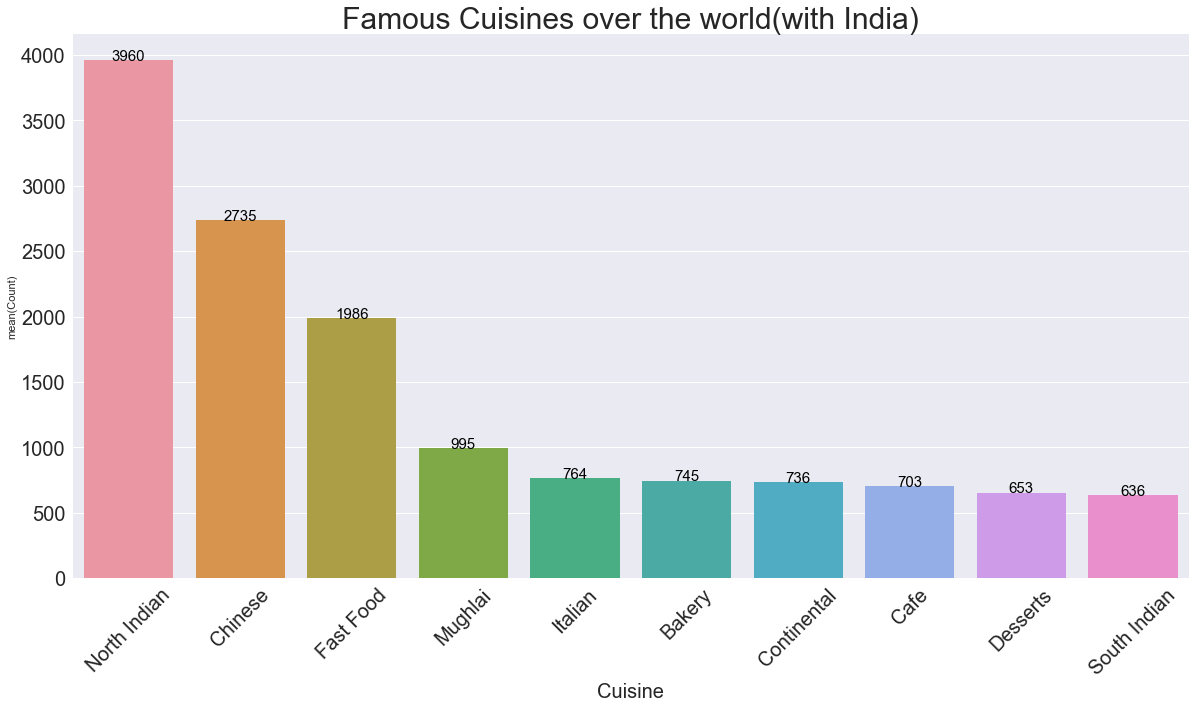

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(cuisine_count_with_india.Cuisine, cuisine_count_with_india.Count)
plt.xticks(fontsize=20, rotation=45)
plt.xlabel("Cuisine", fontsize=20)
plt.yticks(fontsize=20)
plt.title("Famous Cuisines over the world(with India)", fontsize=30)

x=0
for i in cuisine_count_with_india.values:
    plt.text(x, i[1], i[1], color='black', ha="center", fontsize=15)
    x+=1
plt.show()

In [34]:
cuisine_count_without_india = pd.DataFrame(cuisine_df[cuisine_df['Country']!='India']
                                           ['Cuisine'].value_counts().head(10)).reset_index()
cuisine_count_without_india.columns=['Cuisine','Count']

cuisine_count_without_india

,Cuisine,Count
0,American,165
1,Seafood,93
2,Burger,86
3,Italian,82
4,Cafe,76
5,Pizza,68
6,Indian,63
7,Steak,60
8,Desserts,56
9,Sushi,54


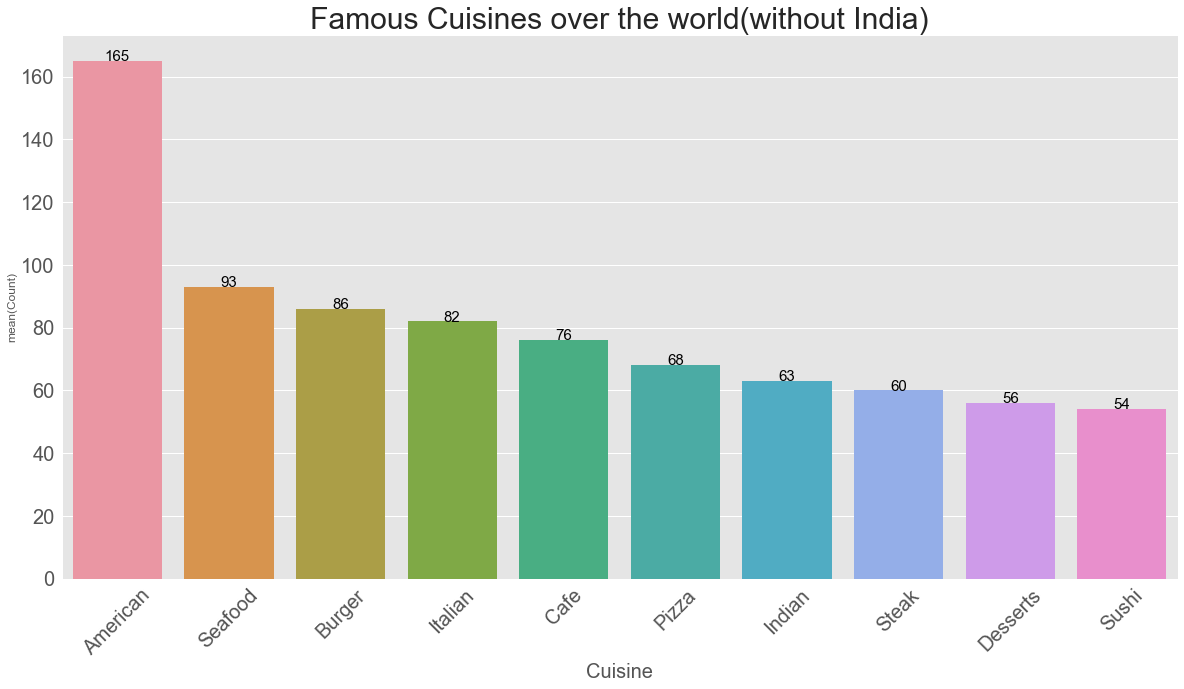

In [230]:
plt.figure(figsize=(20,10))
sns.barplot(cuisine_count_without_india.Cuisine, cuisine_count_without_india.Count)
plt.xticks(fontsize=20, rotation=45)
plt.xlabel("Cuisine", fontsize=20)
plt.yticks(fontsize=20)
plt.title("Famous Cuisines over the world(without India)", fontsize=30)

x=0
for i in cuisine_count_without_india.values:
    plt.text(x, i[1], i[1], color='black', ha="center", fontsize=15)
    x+=1
plt.show()

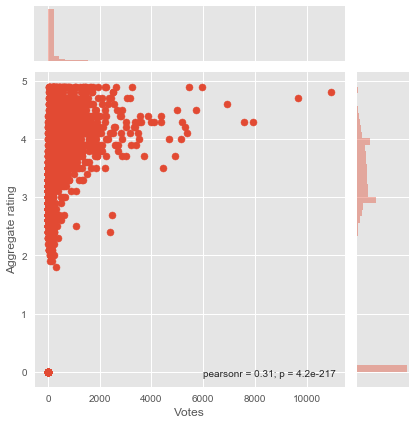

In [132]:
plt.figure(figsize=(30,20))
sns.jointplot(x='Votes', y='Aggregate rating', data=df)
plt.show()

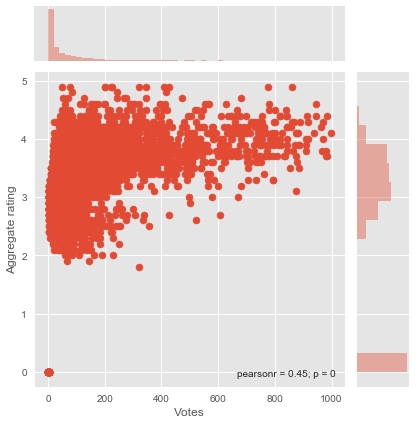

In [148]:
#Lets 
plt.figure(figsize=(30,20))
sns.jointplot(x='Votes', y='Aggregate rating', data=df[(df['Votes']<1000) & (df['Country']=='India')])
plt.show()

In [ ]:
#Lets 
plt.figure(figsize=(30,20))
sns.jointplot(x='Votes', y='Aggregate rating', data=df[(df['Votes']<1000) & (df['Country']=='India')])
plt.show()

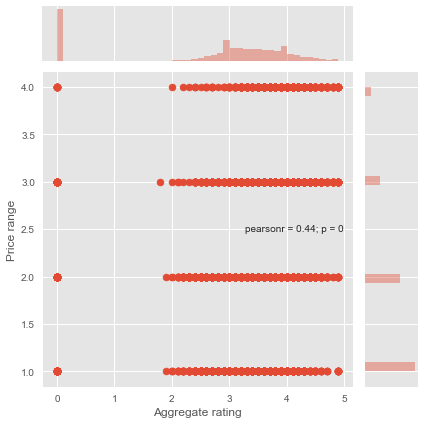

In [155]:
#Lets find the correlation between the Aggregate rating and average cost for two

plt.figure(figsize=(30,20))
sns.jointplot(x='Aggregate rating', y='Price range', data=df)
plt.show()

In [188]:
#cuisine_df.Cuisine.str.find('Indian')

cuisine_df[cuisine_df['Cuisine'].str.contains("_", na=False)][["Restaurant Name","Country","Cuisine"]]

,Restaurant Name,Country,Cuisine
9530,Y۱ld۱z Aspava,Turkey,D�_ner
9544,Karak�_y G�_ll�_o��lu,Turkey,B�_rek


In [178]:
cuisine_df['Cuisine'][9530] = "Diner"

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [194]:
cuisine_df[cuisine_df['Country']=='Turkey'][["Restaurant Name","Country","Cuisine"]]

,Restaurant Name,Country,Cuisine
9517,Timboo Cafe,Turkey,Cafe
9518,Hattena Hatay Sofras۱,Turkey,Kebab
9519,Masaba��۱ Kebap�_۱s۱,Turkey,Kebab
9519,Masaba��۱ Kebap�_۱s۱,Turkey,Turkish Pizza
9520,Turta Home Cafe,Turkey,Cafe
9520,Turta Home Cafe,Turkey,Desserts
9521,Liva,Turkey,Patisserie
9521,Liva,Turkey,Coffee and Tea
9522,Me��hur Tavac۱ Recep Usta,Turkey,Kebab
9523,�ukura��a Sofras۱,Turkey,Kebab


In [193]:
#We realise that there was a problem with some strings in the 'Cuisines' column. 
#Hence, we make changes in the original dataset

df[df['Country']=='Turkey'][["Restaurant Name","Country","Cuisines"]]

,Restaurant Name,Country,Cuisines
9517,Timboo Cafe,Turkey,Cafe
9518,Hattena Hatay Sofras۱,Turkey,Kebab
9519,Masaba��۱ Kebap�_۱s۱,Turkey,"Kebab, Turkish Pizza"
9520,Turta Home Cafe,Turkey,"Cafe, Desserts"
9521,Liva,Turkey,"Patisserie, Coffee and Tea"
9522,Me��hur Tavac۱ Recep Usta,Turkey,Kebab
9523,�ukura��a Sofras۱,Turkey,"Kebab, Izgara"
9524,Gaga Manjero,Turkey,World Cuisine
9525,Cafemiz,Turkey,"World Cuisine, Mexican, Italian"
9526,Nusr-Et,Turkey,Steak


In [192]:
#These were the string that were running outside the scope of ascii
df['Cuisines'][9530] = "Kebab, Turkish Pizza, Doner"
df['Cuisines'][9544] = "Desserts, Borek"

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [210]:
#Making the cuisine_df again

s = df['Cuisines'].str.split(',').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Cuisine'
#del df['Cuisines']
cuisine_df = df.join(s)
del cuisine_df['Cuisines']

cuisine_df=cuisine_df[['Restaurant ID','Restaurant Name', 'Country Code', 'City',
        'Country', 'Address', 'Locality', 'Locality Verbose', 
        'Longitude', 'Latitude', 'Cuisine', 'Average Cost for two', 
        'Currency', 'Has Table booking', 'Has Online delivery', 
        'Is delivering now', 'Switch to order menu', 'Price range', 
        'Aggregate rating', 'Rating color', 'Rating text', 'Votes' ]]

cuisine_df.Cuisine = cuisine_df.Cuisine.str.strip(' ')

In [229]:
writer = ExcelWriter('/Users/rushabh/Desktop/cuisine_df.xlsx')
cuisine_df[['Restaurant ID','Cuisine','Country','Longitude','Latitude','Has Table booking',
           'Price range','Aggregate rating','Rating text','Votes']].to_excel(writer, index=False)
writer.save()

In [228]:
cuisine_df['Price range'].value_counts()

1    7434
2    7133
3    3761
4    1391
Name: Price range, dtype: int64

In [219]:


cuisine_df[cuisine_df['City'].str.contains("stanbul", na=False)][["Restaurant Name","Country","City","Cuisine"]]

,Restaurant Name,Country,City,Cuisine
9537,J'adore Chocolatier,Turkey,Istanbul,Desserts
9538,Starbucks,Turkey,Istanbul,Cafe
9539,Valonia,Turkey,Istanbul,Restaurant Cafe
9539,Valonia,Turkey,Istanbul,Desserts
9540,Draft Gastro Pub,Turkey,Istanbul,Bar Food
9541,Emirgan S�_ti��,Turkey,Istanbul,Restaurant Cafe
9541,Emirgan S�_ti��,Turkey,Istanbul,Turkish
9541,Emirgan S�_ti��,Turkey,Istanbul,Desserts
9542,Leman K�_lt�_r,Turkey,Istanbul,Restaurant Cafe
9543,Dem Karak�_y,Turkey,Istanbul,Cafe


In [218]:
df['Cuisines'][9530] = "Kebab, Turkish Pizza, Doner"

for i in range(9537,9551):
    cuisine_df['City'][i]="Istanbul"

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
